Text(0.5, 1.0, 'activation_functions')

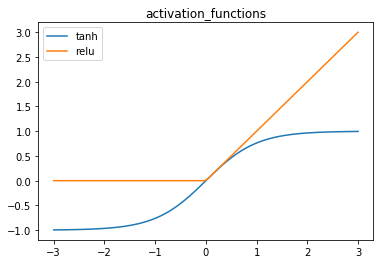

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scale = StandardScaler()
X_train_scal = scale.fit_transform(X_train)
X_test_scal = scale.transform(X_test)

mlp = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train_scal, y_train)

print(mlp.score(X_test_scal, y_test))

0.84


In [3]:
mlp.coefs_

[array([[-1.79209407,  1.62368407, -3.26820516, -0.9006873 , -0.47069379,
          3.4797176 , -6.33158228,  1.02982855,  5.54733279,  1.1132946 ],
        [-0.99925624,  0.69515005,  1.39444155, -0.64158824, -0.13783374,
         -2.25163972, -1.60957414, -2.09625235,  0.92861547, -0.75945554]]),
 array([[-0.54901534,  0.61981916, -0.75269089,  1.49441564, -2.97506997,
         -0.47155532,  1.69094642, -0.04282921, -0.14197117,  2.14464579],
        [-0.2401178 , -0.08760104, -0.491903  ,  0.36155752,  0.86873926,
          0.37452178, -0.70434985, -0.42180953,  0.44949199,  1.28231816],
        [ 0.07681042, -0.05447823,  0.64276971, -0.31107075, -0.28072753,
         -0.34110056,  0.45094599, -0.26995226,  0.11122951,  0.14170292],
        [-0.37316091, -0.40541176, -0.09053585,  0.56962415, -0.5707096 ,
         -0.88260085,  2.95835672, -0.53432262, -0.31577372,  1.65753884],
        [ 0.21381466,  0.15841494,  0.52167958, -0.33276509,  0.13511494,
         -0.50391662,  0.41343

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#Scalling
X_train_scal = scale.fit_transform(X_train)
X_test_scal = scale.transform(X_test)

In [34]:
#linier model for camparison with MLP for accuray 
svc = SVC(kernel='rbf', C=0.5).fit(X_train_scal, y_train)
print('Training Test SVC: %f'% svc.score(X_train_scal, y_train))
print('Training Test SVC: %f'% svc.score(X_test_scal, y_test))

Training Test SVC: 0.976526
Training Test SVC: 0.972028


In [60]:
#MLP Model
mlp = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[10, 10], ).fit(X_train_scal, y_train)

print('Training Test SVC: %f'% mlp.score(X_train_scal, y_train))
print('Training Test SVC: %f'% mlp.score(X_test_scal, y_test))

Training Test SVC: 1.000000
Training Test SVC: 0.986014


In [57]:
from sklearn.model_selection import cross_val_score

cross = cross_val_score(mlp, X_train_scal, y_train, cv=10)
cross

array([0.95348837, 0.95348837, 1.        , 0.95348837, 0.93023256,
       1.        , 0.95238095, 0.95238095, 1.        , 0.92857143])

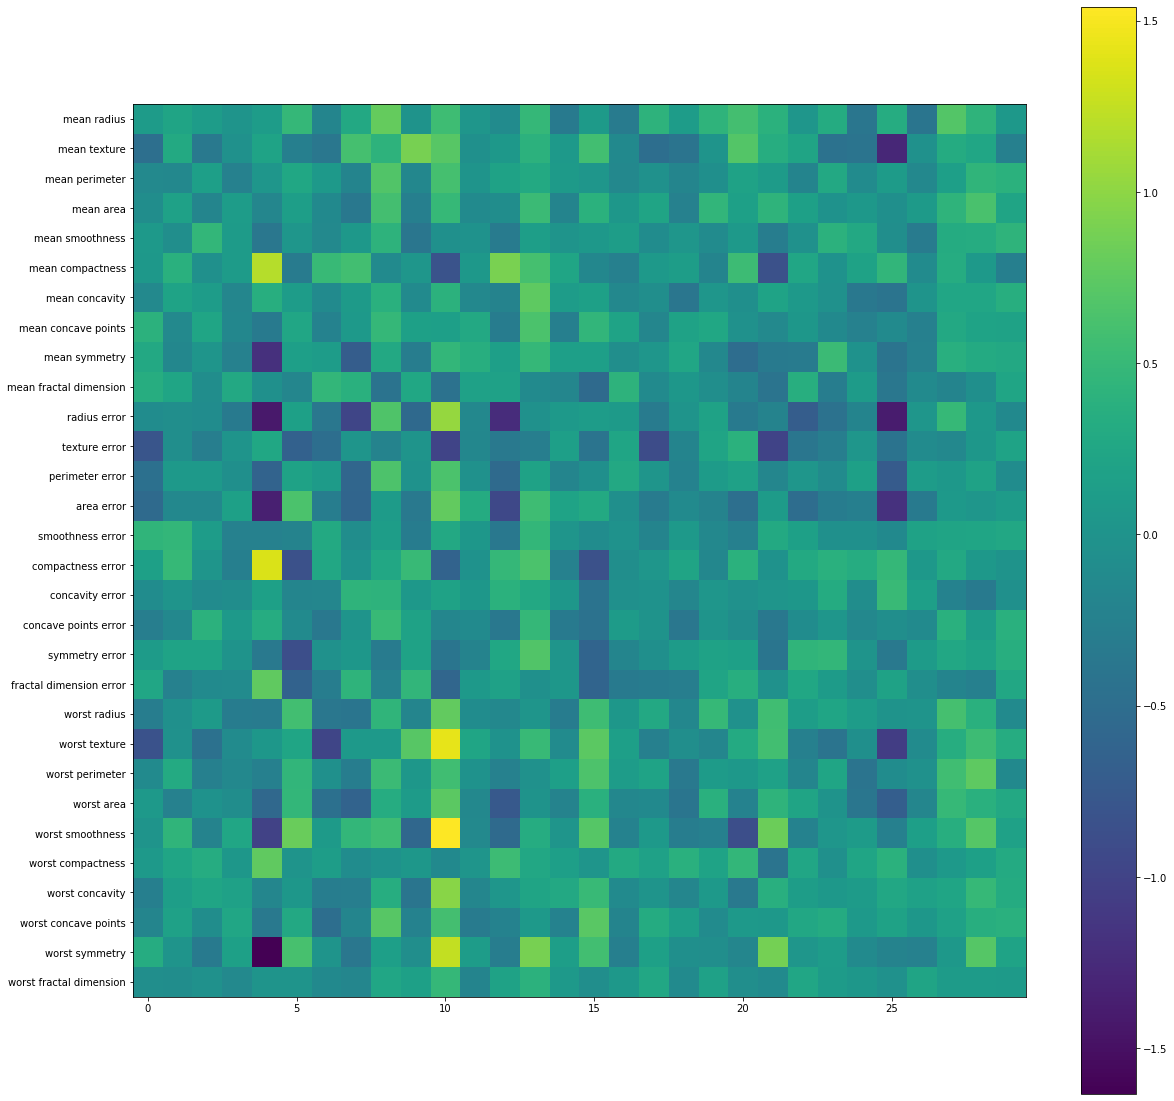

In [47]:
plt.figure(figsize=(20, 20))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()

# Uncertainty fir classification

## `Decision Function`

In [65]:
print('Training data SVC', X_train_scal.shape)
print('Decision funtion shape in training data SVC',svc.decision_function(X_train_scal).shape)

Training data SVC (426, 30)
Decision funtion shape in training data SVC (426,)


In [71]:
mlp.predict_proba(X_test_scal)[:6]

array([[0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 6.22671620e-260],
       [3.66520304e-005, 9.99963348e-001],
       [1.31194478e-009, 9.99999999e-001],
       [1.00000000e+000, 1.45393180e-045],
       [1.00000000e+000, 0.00000000e+000]])